In [4]:
import requests
from skimage import io
import numpy as np
import math
import matplotlib.pyplot as plt

In [5]:
def get_index(i1: tuple, i2: tuple) -> tuple:
    return tuple(map(lambda x,y: x + y, i1, i2))

In [6]:
def idx_is_valid(width, height, x, y):
    return 0 <= x < width and 0 <= y < height

In [7]:
def gaussian_pixel(sigma, x, y):
    c = 1 / (2*np.pi*sigma*sigma)
    e = math.exp(-(x*x + y*y) / (2*sigma*sigma))
    
    return (1 / (2*np.pi*sigma*sigma)) * math.exp(-(x*x + y*y) / (2*sigma*sigma))

def create_gaussian_kernel(sigma):
    order = 3*sigma + 2
    center = order//2
    center_idx = (center, center)
    
    gaussian_kernel = np.zeros((order,order))
    for x in range(-center, center+1):
        for y in range(-center, center+1):
            i_idx = get_index(center_idx, (x,y))
            
            gaussian_kernel[i_idx] = gaussian_pixel(sigma, x, y)
        
    return gaussian_kernel / np.sum(gaussian_kernel)

In [8]:
def convolute_pixel(image, idx, kernel):
    w, h = image.shape
    n, _ = kernel.shape
    center = n // 2
    center_idx = (center, center)
    
    convoluted_pixel = 0
    for kx in range(-center, center+1):
        for ky in range(-center, center+1):
            i_idx = get_index(idx, (kx,ky))
            k_idx = get_index(center_idx, (kx,ky))
            
            convoluted_pixel += image[i_idx] * kernel[k_idx] if idx_is_valid(w, h, *i_idx) else 0
    
    return convoluted_pixel

In [9]:
def convolution(img, kernel):   
    convoluted_image = np.zeros(img.shape, dtype=np.uint8)
    w, h = img.shape
    
    for x in range(w):
        for y in range(h):
            convoluted_image[(x,y)] = convolute_pixel(img, (x,y), kernel)
    
    return np.array(convoluted_image)

In [10]:
def read_image(url):
    return io.imread(url, as_gray=True)

In [25]:
url = 'https://www.dropbox.com/s/updljye8v80pipg/building.jpg?dl=1'
img = read_image(url)
kernel = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

improved_img = convolution(img, kernel)

uint8
[[0.99607843 0.99215686 0.99607843 ... 0.31372549 0.32156863 0.33333333]
 [0.99215686 0.96862745 0.96862745 ... 0.3254902  0.3254902  0.32941176]
 [1.         1.         0.98823529 ... 0.33333333 0.32941176 0.3254902 ]
 ...
 [0.28235294 0.29411765 0.30980392 ... 0.30588235 0.31372549 0.31764706]
 [0.32941176 0.34509804 0.35294118 ... 0.30980392 0.31764706 0.32156863]
 [0.29803922 0.31764706 0.32941176 ... 0.3372549  0.34117647 0.34509804]]
uint8
[[241 226 228 ...  77  77 251]
 [  4   3 253 ...  16   7 254]
 [  2  18  13 ...   8   6   2]
 ...
 [ 15  33  41 ...  36  36  27]
 [ 14  21  17 ...  31  29  21]
 [  0 162 158 ... 195 189  11]]


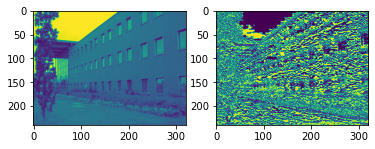

In [29]:
%matplotlib inline
# Passo a passo de como criar uma figura muito massa e customizável
# Inicializando a figura
fig = plt.figure()

# Adicione axes para a figura
# add_axes é melhor usar quando o posicionamento EXATO dos subplots
# é importante
# fig.add_axes([0,0,1,1])

# Senão podemos usar add_subplot, para posicionar os subplots
# em um grid
ax1 = fig.add_subplot(121) # que nem no scilab
ax2 = fig.add_subplot(122)

# Espalhe os dados
# ax1.boxplot(improved_img)
# ax.scatter(np.linspace(0, 1, 5), np.linspace(0, 5, 5))
print(img.dtype)
print(img/255)
print(img.dtype)
print(improved_img)
# Mostre o plot
ax1.imshow(img)
ax2.imshow(improved_img)


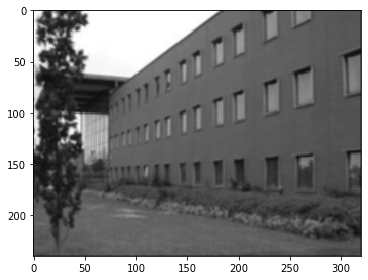

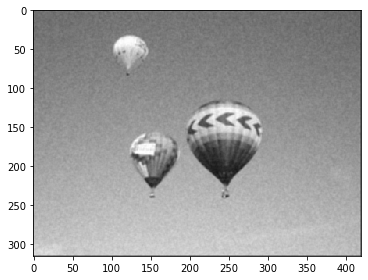

In [23]:
img_urls = ['https://www.dropbox.com/s/updljye8v80pipg/building.jpg?dl=1', 'https://www.dropbox.com/s/lcoqk6btwll8dbg/noisy.jpg?dl=1']

kernel = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

avg_3x3_kernel = np.ones((3,3)) / 9
# avg_5x5_kernel = np.ones((5,5)) / 25 
# gaussian_kernel = create_gaussian_kernel(sigma=1)

kernels = [avg_3x3_kernel]

for img_url in img_urls:
    img = read_image(img_url)

    for k in kernels:
        improved_img = convolution(img, k)
        
        io.imshow(improved_img)
        io.show()
        